**First, I import all the libraries and data for work.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
def encode(x):
 return 1 if x == 'Partial' else 0

def encode1(x):
 if (x == 4):
        return 3
 else:
        return x
        
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train.head()
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test.head()

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Now let's check the deviations. In order for the statistical approaches that I will use to work. I will also reduce these deviations.**

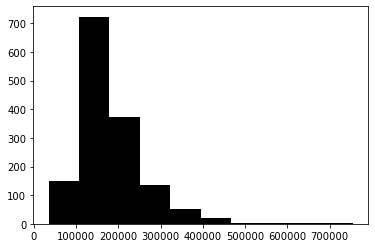

In [2]:
plt.hist(train.SalePrice, color='black')
plt.show()


**It turns out that these deviations are too large. I will reduce them.**

**I will take the logarithm of my data and get a graph that is more similar to what I need.**

Deviation:  0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


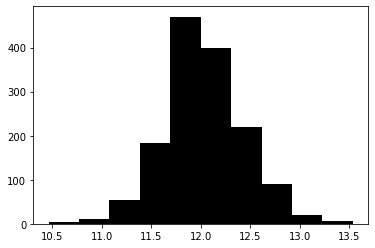

In [3]:
deviation = np.log(train.SalePrice)
print("Deviation: ", deviation)
plt.hist(deviation, color='black')
plt.show()

**Now let's look at what influences the price of the house itself and analyze the data.**

In [4]:
influences = train.select_dtypes(include=[np.number])
influences.dtypes
percent = influences.corr()
print (percent['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (percent['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


**Thus, we got that the price is most affected by: OverallQual, GrLivArea, GarageCars, GarageArea, YrSold, OverallCond, MSSubClass, EnclosedPorch, KitchenAbvGr.**

**Let's chek the more datails**

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


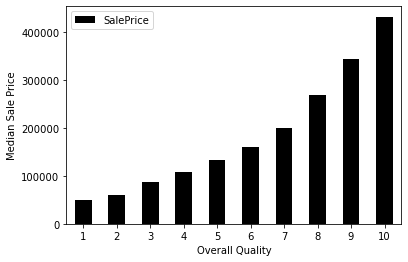

In [5]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
print(quality_pivot)
quality_pivot.plot(kind='bar', color='black')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

**Now let's see the rest of the factors that affect the price.**

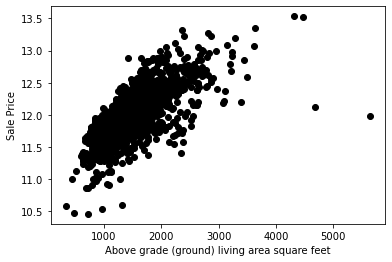

In [6]:
plt.scatter(x=train['GrLivArea'], y=deviation, color="black")
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

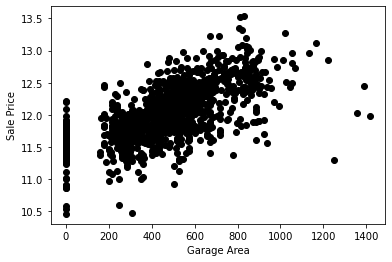

In [7]:
plt.scatter(x=train['GarageArea'], y=deviation, color="black")
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

**Thus, we got the graphs and now it would be worth removing the points that could shift our line from the "center of events".**

**Let's set the maximum value of the garage area to 1200, so that the line doesn't run away from us.**

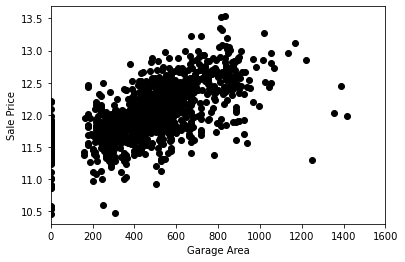

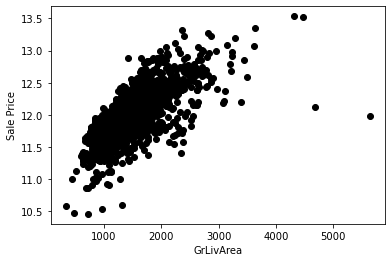

In [8]:

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice), color="black")
plt.xlim(-1,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


plt.scatter(x=train['GrLivArea'], y=deviation, color="black")
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

train = train[train['GrLivArea'] < 4000]
train = train[train['GarageArea'] < 1200]

**After that we have**

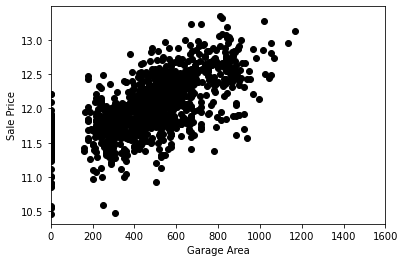

In [9]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice), color="black")
plt.xlim(-1,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

**Now let's check all NULL**

In [10]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
print(nulls)

                 0
PoolQC        1447
MiscFeature   1399
Alley         1361
Fence         1172
FireplaceQu    689
LotFrontage    258
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
Id               0
Functional       0
Fireplaces       0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0


**We got a table with NULLs**

**Now let's chek data without numbers(non-numeric)**

In [11]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


**Let's use one-hot encoding method for our non-numeric data**

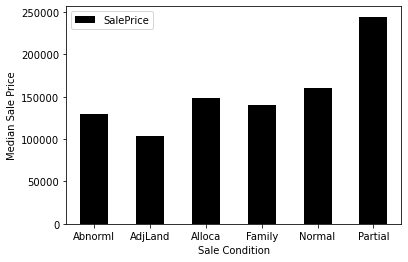

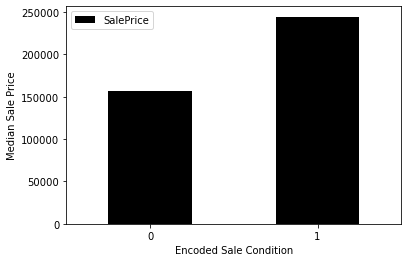

In [12]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='black')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
train['enc_condition1'] = train.KitchenAbvGr.apply(encode1)
test['enc_condition1'] = test.KitchenAbvGr.apply(encode1)
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='black')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

**Thus, we redid the reasons for the sale and got a simpler model, which is easier to work with both for us and the computer. 
And also, those data that we do not use have been converted to zero, also in order to make it easier for us to work.**

**Now let's start building our linear model.**

In [13]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
actual_values = y_test


**Now let's build our line with a predicted price.**

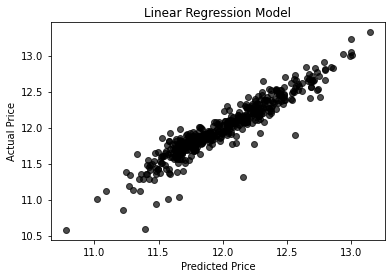

In [14]:
plt.scatter(predictions, actual_values, alpha=.7,
            color='black')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

**Now let's change our alpha a little and get some graphics. With alpha = 1 we get better prediction.**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


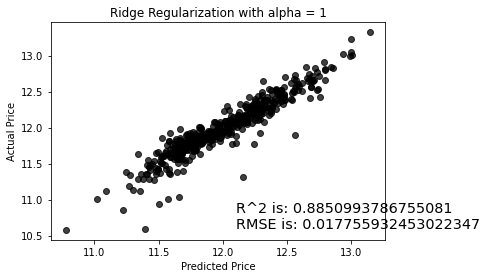

In [15]:
alpha = 1
rm = linear_model.Ridge(alpha=alpha)
ridge_model = rm.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_test)
plt.scatter(preds_ridge, actual_values, alpha=.75, color='black')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regularization with alpha = {}'.format(alpha))
overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                ridge_model.score(X_test, y_test),
                mean_squared_error(y_test, preds_ridge))
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()

**Finally, we get our final answer.**

In [16]:
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = ridge_model.predict(feats)
final_predictions = np.exp(predictions)
print ("Final predictions are: \n", final_predictions[:5])

Final predictions are: 
 [125312.14675073 123818.61581104 177152.39469018 197395.06994946
 180659.86804346]
